In [1]:
%matplotlib inline

In [2]:
# make survos2 importable
import sys
sys.path.append("./..")

lets explore the siniture, return values and types

In [3]:
from survos2.data import embrain
from survos2.improc.features import gaussian
from survos2.improc.regions.slic import slic3d

In [4]:
import numpy as np
from skimage import data, color, filters, segmentation
from skimage.util import img_as_float32, img_as_float64
from skimage.segmentation import slic as skslic
from skimage.segmentation import mark_boundaries

import matplotlib.pyplot as plt
from ipywidgets import interact
import time

In [5]:
blob = data.binary_blobs(length=412, n_dim=3, seed=2)
blob = img_as_float32(blob)
s = time.time()
labels = slic3d(blob, nsp=100, compactness=10)
print(time.time()-s)

86.86004042625427


82.25755143165588


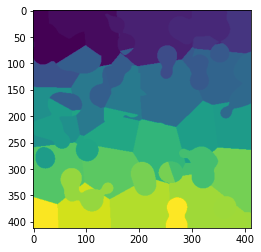

In [6]:
blob = img_as_float64(blob)
s = time.time()
labels = skslic(blob, n_segments=200, compactness=1,  multichannel=False)
print(time.time()-s)
plt.imshow(labels[...,1])

In [7]:
marked_blob = mark_boundaries(color.gray2rgb(blob), labels)

In [8]:
def plot_slice(images, z, titles=None, cols=2):
    rows = (len(images)+cols-1)//cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*8, rows*8))
    for i in range(len(images)):
        axes[i].imshow(images[i][:,:,z])
        axes[i].axis('off')
        if titles:
            axes[i].set_title(titles[i], size=32)

In [13]:
from ipywidgets import IntSlider, fixed
interact(plot_slice, images=fixed([marked_blob, blob]), titles=fixed(None), z=IntSlider(min=0, max=99), cols=fixed(2))

interactive(children=(IntSlider(value=0, description='z', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_slice(images, z, titles=None, cols=2)>

In [14]:
blob = data.binary_blobs(length=300, n_dim=3, seed=2)
blob = filters.gaussian(blob)
blob = blob[:,:,:10]

In [15]:
def compare_slic_algos(c1, c2, n_segments=100, z=0):
    labels1 = slic3d(img_as_float32(blob), nsp=n_segments, compactness=c1)
    labels2 = skslic(blob, n_segments=n_segments, compactness=c2, multichannel=False)
    marked_blob1 = mark_boundaries(color.gray2rgb(blob), labels1, color=(0.2, 1, 0))
    marked_blob2 = mark_boundaries(color.gray2rgb(blob), labels2, color=(1, 0.7, 0))
    plot_slice([marked_blob1, marked_blob2], z=z, titles=["cuda-slic", "skimage-slic"])

In [17]:
interact(compare_slic_algos,
         c1=(0.001,500,0.01),
         c2=(0.001,2.0,0.001),
         n_segments=(5,5000),
         z=IntSlider(min=0, max=9))

interactive(children=(FloatSlider(value=249.991, description='c1', max=500.0, min=0.001, step=0.01), FloatSlid…

<function __main__.compare_slic_algos(c1, c2, n_segments=100, z=0)>